In [0]:
import os

import numpy as np 
import pandas as pd
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
os.listdir('/content/gdrive/My Drive/Colab Notebooks/data/train/')

['mindy_kaling', 'jerry_seinfeld', 'madonna', 'elton_john', 'ben_afflek']

In [0]:
os.listdir('/content/gdrive/My Drive/Colab Notebooks/data/train/mindy_kaling')

['httppixelnymagcomimgsfashiondailymindykalingwhjpg.jpg',
 'httpsamazonawscomkidzworldphotoimagesbccdddaaadgallerymindykalinggalleryjpg.jpg',
 'httpsimagesnasslimagesamazoncomimagesIAQdwKvFILUXjpg.jpg',
 'httpsimgbuzzfeedcombuzzfeedstaticstaticcampaignimageswebdradorableetsyitemsallmindykalingfansneedbigjpg.jpg',
 'httpimagesnymagcomimagesdailymindykalingxjpg.jpg',
 'httpgonetworthcomwpcontentuploadsthumbsjpg.jpg',
 'httpssmediacacheakpinimgcomxafaffbbbbdbcbdddjpg.jpg',
 'httpgraphicsnytimescomimagesmagazinekalingkalingarticleInlinejpg.jpg',
 'httpmediaonsugarcomfilesbabaaaaaMindyInterviewxxxlargejpg.jpg',
 'httpssmediacacheakpinimgcomxcccccddbbfedabjpg.jpg',
 'httpssmediacacheakpinimgcomxccccdabeaadjpg.jpg',
 'httpsuploadwikimediaorgwikipediacommonsthumbMindyBKalingBPaleyFestBNewBYorkBBMindyBIqZgUWvbljpgpxMindyBKalingBPaleyFestBNewBYorkBBMindyBIqZgUWvbljpg.jpg',
 'httpssmediacacheakpinimgcomxededbebccdajpg.jpg',
 'httpwwwadweekcomfilesimagecachenodeinlinemindykalingprofilehedjpg.jpg',

In [0]:
'/content/gdrive/My Drive/Colab Notebooks/data/train/ben_afflek/httpwwwallposterscomimagesPostersPFjpg.jpg'

'/content/gdrive/My Drive/Colab Notebooks/data/train/ben_afflek/httpwwwallposterscomimagesPostersPFjpg.jpg'

In [0]:
file_name='/content/gdrive/My Drive/Colab Notebooks/data/train/mindy_kaling/httppixelnymagcomimgsfashiondailymindykalingwhjpg.jpg'

In [0]:
img=cv2.imread(file_name)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

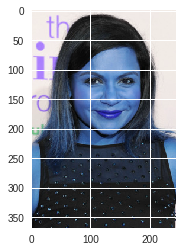

In [0]:
plt.imshow(img)

In [0]:
img.shape

(368, 245, 3)

In [0]:
img = cv2.resize(img, (100,100))

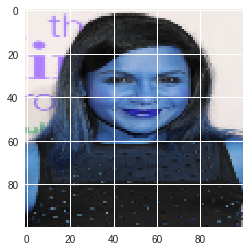

In [0]:
plt.imshow(img)

In [0]:
img.shape

(100, 100, 3)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,Conv2D, MaxPool2D,Flatten
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(100,100,3)))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu',))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(84, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 32)      2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 32)      25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 80000)             0         
_________________________________________________________________
dense_1 (Dense)      

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
          featurewise_center=False,            # set input mean to 0 over the dataset
          samplewise_center=False,             # set each sample mean to 0
          featurewise_std_normalization=False, # divide inputs by std of the dataset
          samplewise_std_normalization=False,  # divide each input by its std
          zca_whitening=False,                 # apply ZCA whitening
          rotation_range=30,                   # randomly rotate images in the range (degrees, 0 to 180)
          zoom_range = 0.1,                    # Randomly zoom image 
          width_shift_range=0.1,               # randomly shift images horizontally (fraction of total width)
          height_shift_range=0.1,              # randomly shift images vertically (fraction of total height)
          horizontal_flip=False,               # randomly flip images
          vertical_flip=False)                 # randomly flip images

In [0]:
training_set = datagen.flow_from_directory(
    '/content/gdrive/My Drive/Colab Notebooks/data/train/',
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    '/content/gdrive/My Drive/Colab Notebooks/data/val/',
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)



Found 93 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


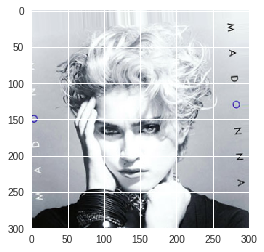

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
madona=   cv2.imread('/content/gdrive/My Drive/Colab Notebooks/data/val/madonna/httpassetsrollingstonecomassetsimagesalbumreviewaffaceabdcccaeedjpg.jpg')
plt.imshow(datagen.random_transform(madona))

In [0]:
training_set.class_indices

{'ben_afflek': 0,
 'elton_john': 1,
 'jerry_seinfeld': 2,
 'madonna': 3,
 'mindy_kaling': 4}

In [0]:
model.fit_generator(
    training_set,
    steps_per_epoch=10,
    epochs=10,
)

Epoch 1/10
10/10 [==============================] - 14s 1s/step - loss: 13.1469 - acc: 0.1843
Epoch 2/10
10/10 [==============================] - 2s 205ms/step - loss: 13.2426 - acc: 0.1784
Epoch 3/10
10/10 [==============================] - 2s 205ms/step - loss: 13.0580 - acc: 0.1899
Epoch 4/10
10/10 [==============================] - 2s 206ms/step - loss: 13.2243 - acc: 0.1795
Epoch 5/10
10/10 [==============================] - 2s 206ms/step - loss: 13.3294 - acc: 0.1730
Epoch 6/10
10/10 [==============================] - 2s 206ms/step - loss: 13.0169 - acc: 0.1924
Epoch 7/10
10/10 [==============================] - 2s 205ms/step - loss: 13.1927 - acc: 0.1815
Epoch 8/10
10/10 [==============================] - 2s 205ms/step - loss: 13.0627 - acc: 0.1896
Epoch 9/10
10/10 [==============================] - 2s 211ms/step - loss: 13.1779 - acc: 0.1824
Epoch 10/10
10/10 [==============================] - 2s 206ms/step - loss: 13.3080 - acc: 0.1743


In [0]:
  madona1 = cv2.resize(madona, (100,100))
  
  madona11 = madona1/255

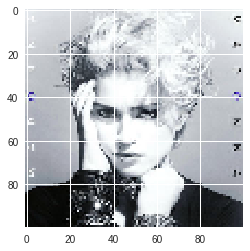

In [0]:
plt.imshow(madona11)
madona11=madona11.reshape(1,100,100,3)

In [0]:
model.predict(madona11)

array([[5.0470652e-26, 1.0000000e+00, 0.0000000e+00, 2.3975993e-26,
        7.8012811e-28]], dtype=float32)

In [0]:
model.predict_classes(madona11)

array([1])

In [0]:
face_cascade = cv2.CascadeClassifier('/content/gdrive/My Drive/Colab Notebooks/cascade/haarcascades/haarcascade_frontalface_default.xml')

In [140]:
xtrain = []
xtrain_full=[]
for imgfolder in os.listdir('/content/gdrive/My Drive/Colab Notebooks/data/train/'):
  for filename in os.listdir('/content/gdrive/My Drive/Colab Notebooks/data/train/' + imgfolder):
    filename1='/content/gdrive/My Drive/Colab Notebooks/data/train/'+imgfolder+ '/' + filename
    #print(filename1)
    img = cv2.imread(filename1)
    face_rects = face_cascade.detectMultiScale(img) 
    if face_rects==():
      img=None
      img1=None
    else:
      x=face_rects[0][0]
      y=face_rects[0][1]
      width=face_rects[0][2]
      height=face_rects[0][3]
      img1=cv2.resize(img[x:x+width,y:y+height] , (100,100), interpolation = cv2.INTER_AREA) 
      #img = cv2.resize(img , (100,100), interpolation = cv2.INTER_AREA)    #plt.imshow(img)
      
    xtrain.append(img1)
    xtrain_full.append(img)
#xtrain = np.asarray(xtrain)
#xtrain_full = np.asarray(xtrain_full)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


In [0]:
index=[]
for i,x in enumerate(xtrain):
  if x is None:
    index.append(i)

In [142]:
index

[17, 48, 54, 56, 70, 76, 79, 82]

In [0]:
ytrain=[]
for imgfolder in os.listdir('/content/gdrive/My Drive/Colab Notebooks/data/train/'):
  for filename in os.listdir('/content/gdrive/My Drive/Colab Notebooks/data/train/' + imgfolder):
    ytrain.append(imgfolder)

In [0]:

for ind in sorted(index, reverse=True):
    del ytrain[ind]

In [145]:
len(ytrain)

85

In [146]:
len(xtrain)

93

In [0]:

#from operator import is_not
#from functools import partial

#xtrain=filter(partial(is_not, None), xtrain)


In [0]:
xtrain=[x for x in xtrain if x is not None]


In [148]:
len(xtrain)

85

In [0]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(ytrain)

In [150]:
y

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [155]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,Conv2D, MaxPool2D,Flatten
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(100,100,3)))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu',))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(84, activation='relu'))
model.add(Dense(1, activation='softmax'))
model.summary()

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 100, 100, 32)      2432      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 100, 100, 32)      25632     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 80000)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 84)                6720084   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 85        
Total para

In [0]:
xtrain=np.asarray(xtrain)

In [153]:
xtrain.shape

(85, 100, 100, 3)

In [159]:
model.fit(xtrain,y,epochs=10)

Epoch 1/10
85/85 [==============================] - 0s 2ms/step - loss: nan - acc: 0.1765
Epoch 2/10
85/85 [==============================] - 0s 2ms/step - loss: nan - acc: 0.1765
Epoch 3/10
85/85 [==============================] - 0s 2ms/step - loss: nan - acc: 0.1765
Epoch 4/10
85/85 [==============================] - 0s 2ms/step - loss: nan - acc: 0.1765
Epoch 5/10
85/85 [==============================] - 0s 2ms/step - loss: nan - acc: 0.1765
Epoch 6/10
85/85 [==============================] - 0s 2ms/step - loss: nan - acc: 0.1765
Epoch 7/10
85/85 [==============================] - 0s 2ms/step - loss: nan - acc: 0.1765
Epoch 8/10
85/85 [==============================] - 0s 2ms/step - loss: nan - acc: 0.1765
Epoch 9/10
85/85 [==============================] - 0s 2ms/step - loss: nan - acc: 0.1765
Epoch 10/10
85/85 [==============================] - 0s 2ms/step - loss: nan - acc: 0.1765
